In [44]:
import os
import re
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go

In [45]:
data = pd.DataFrame.from_csv(r'.\reads_stat-BRAC160408.csv', header=0)
data

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,53,198,260,491,600,596,909,693,988,944,...,1792,2246,1417,825,2334,241,607,62,24,910
chr13-B150B01-32893117,648,2728,2545,2874,1586,1527,1856,2857,2703,2660,...,1122,1099,1172,268,1539,182,469,36,28,513
chr13-B150A02-32893303,31,117,120,374,376,334,583,508,627,609,...,1201,1084,801,100,1168,96,312,35,22,251
chr13-B150B02-32899030,710,2839,2648,2741,1711,1373,2077,3202,2711,3228,...,1387,1148,1447,311,1503,222,508,46,27,593
chr13-B150A03-32899219,39,270,316,640,781,805,1223,1082,1285,1391,...,2517,2366,1744,1096,2791,256,718,76,47,1582
chr13-B150B03-32900034,1407,5507,5221,5756,3315,2796,3710,5345,4843,4643,...,2148,2114,2227,1122,2588,430,858,32,45,1489
chr13-B150A04-32900244,26,123,164,288,377,366,683,502,650,657,...,1230,1287,801,101,1237,146,331,28,26,230
chr13-B150B04-32900558,755,3292,3457,3400,2257,1619,2272,3704,2971,3414,...,1719,1252,1537,339,1486,303,545,33,54,746
chr13-B150A05-32903518,29,217,246,420,463,493,771,654,833,801,...,1482,1664,1062,330,1897,174,440,48,27,382
chr13-B150B05-32904954,1072,4593,4316,4520,2753,2206,3089,4343,3865,4243,...,1879,1635,1935,954,2154,320,735,62,42,1435


In [20]:
p_data = [
    go.Surface(
        z=data.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=p_data, layout=layout)
py.iplot(fig, filename='BRCA')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~codeunsolved/0 or inside your plot.ly account where it is named 'elevations-3d-surface'


In [46]:
data_norm_by_sample = (data - data.min()) / (data.max() - data.min())
data_norm_by_sample

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.005074,0.004924,0.006456,0.013306,0.039899,0.037208,0.036462,0.020408,0.035393,0.033951,...,0.100680,0.057503,0.076405,0.010305,0.065930,0.115201,0.065515,0.057038,0.048682,0.029614
chr13-B150B01-32893117,0.062039,0.067840,0.063195,0.077882,0.105466,0.095330,0.074448,0.084136,0.096830,0.095666,...,0.063037,0.028137,0.063194,0.003348,0.043473,0.086998,0.050621,0.033119,0.056795,0.016694
chr13-B150A02-32893303,0.002968,0.002910,0.002980,0.010135,0.025003,0.020852,0.023385,0.014960,0.022461,0.021903,...,0.067476,0.027753,0.043190,0.001249,0.032993,0.045889,0.033675,0.032199,0.044625,0.008168
chr13-B150B02-32899030,0.067975,0.070601,0.065753,0.074278,0.113778,0.085716,0.083313,0.094296,0.097116,0.116094,...,0.077926,0.029391,0.078022,0.003885,0.042456,0.106119,0.054830,0.042318,0.054767,0.019298
chr13-B150A03-32899219,0.003734,0.006714,0.007847,0.017343,0.051935,0.050256,0.049057,0.031864,0.046033,0.050027,...,0.141412,0.060575,0.094036,0.013691,0.078840,0.122371,0.077496,0.069917,0.095335,0.051482
chr13-B150B03-32900034,0.134706,0.136949,0.129643,0.155981,0.220442,0.174554,0.148817,0.157405,0.173491,0.166984,...,0.120681,0.054123,0.120080,0.014015,0.073105,0.205545,0.092607,0.029439,0.091278,0.048456
chr13-B150A04-32900244,0.002489,0.003059,0.004072,0.007804,0.025070,0.022849,0.027397,0.014783,0.023285,0.023629,...,0.069105,0.032950,0.043190,0.001262,0.034943,0.069790,0.035726,0.025759,0.052738,0.007485
chr13-B150B04-32900558,0.072283,0.081866,0.085841,0.092136,0.150086,0.101074,0.091135,0.109079,0.106430,0.122784,...,0.096578,0.032054,0.082875,0.004235,0.041976,0.144837,0.058824,0.030359,0.109533,0.024277
chr13-B150A05-32903518,0.002776,0.005396,0.006108,0.011381,0.030789,0.030778,0.030927,0.019260,0.029841,0.028808,...,0.083263,0.042602,0.057263,0.004122,0.053586,0.083174,0.047491,0.044158,0.054767,0.012431
chr13-B150B05-32904954,0.102633,0.114220,0.107171,0.122487,0.183070,0.137720,0.123907,0.127897,0.138456,0.152598,...,0.105568,0.041860,0.104335,0.011917,0.060846,0.152964,0.079331,0.057038,0.085193,0.046699


In [47]:
p1_data = [
    go.Surface(
        z=data_norm_by_sample.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA1',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig1 = go.Figure(data=p1_data, layout=layout)
py.iplot(fig1, filename='BRCA1')

In [51]:
data_nbs_T = data_norm_by_sample.T
data_norm_by_double = (data_nbs_T - data_nbs_T.min()) / (data_nbs_T.max() - data_nbs_T.min())
data_norm_by_double = data_norm_by_double.T
data_norm_by_double

,008-E08_S1,008-E10_S2,008-E11_S3,008-E12_S4,008-F08_S5,008-F09_S6,008-F10_S7,008-F11_S8,008-F12_S9,008-G07_S10,...,008-G11_S13,008-G12_S14,008-H08_S15,010-E10_S21,021-D03_S16,021-D05_S17,021-E07_S18,021-F10_S19,021-G08_S20,Y0204_S22
chr13-B150A01-32890522,0.001363,0.000000,0.013894,0.076005,0.317156,0.292756,0.285991,0.140413,0.276298,0.263218,...,0.868323,0.476789,0.648193,0.048800,0.553212,1.000000,0.549449,0.472573,0.396798,0.223889
chr13-B150B01-32893117,0.556083,0.611047,0.567036,0.706187,0.967539,0.871504,0.673656,0.765441,0.885711,0.874688,...,0.565539,0.234870,0.567026,0.000000,0.380177,0.792560,0.447895,0.282070,0.506397,0.126455
chr13-B150A02-32893303,0.025953,0.025072,0.026131,0.134173,0.358681,0.295990,0.334252,0.207031,0.320293,0.311860,...,1.000000,0.400198,0.633292,0.000000,0.479328,0.674049,0.489622,0.467329,0.654958,0.104475
chr13-B150B02-32899030,0.571167,0.594567,0.551362,0.627336,0.979362,0.729273,0.707859,0.805734,0.830870,1.000000,...,0.659846,0.227313,0.660706,0.000000,0.343747,0.911098,0.454019,0.342516,0.453455,0.137358
chr13-B150A03-32899219,0.000000,0.021649,0.029872,0.098849,0.350100,0.337904,0.329198,0.204316,0.307228,0.336241,...,1.000000,0.412854,0.655894,0.072319,0.545515,0.861696,0.535756,0.480709,0.665324,0.346811
chr13-B150B03-32900034,0.551929,0.562189,0.528779,0.649222,0.944009,0.734158,0.616461,0.655736,0.729299,0.699543,...,0.487793,0.183418,0.485044,0.000000,0.270224,0.875885,0.359406,0.070533,0.353330,0.157500
chr13-B150A04-32900244,0.017914,0.026225,0.041015,0.095477,0.347423,0.315019,0.381378,0.197317,0.321377,0.326395,...,0.990009,0.462417,0.611841,0.000000,0.491491,1.000000,0.502921,0.357479,0.751177,0.090812
chr13-B150B04-32900558,0.466561,0.532263,0.559518,0.602675,1.000000,0.663956,0.595814,0.718843,0.700681,0.812805,...,0.633135,0.190738,0.539180,0.000000,0.258767,0.964012,0.374277,0.179115,0.721958,0.137414
chr13-B150A05-32903518,0.000000,0.032551,0.041398,0.106913,0.348036,0.347901,0.349749,0.204794,0.336256,0.323424,...,1.000000,0.494812,0.676964,0.016720,0.631280,0.998893,0.555547,0.514145,0.645949,0.119955
chr13-B150B05-32904954,0.530030,0.597728,0.556546,0.646030,1.000000,0.735035,0.654329,0.677642,0.739335,0.821965,...,0.547177,0.174949,0.539976,0.000000,0.285879,0.824099,0.393882,0.263629,0.428132,0.203221


In [53]:
p2_data = [
    go.Surface(
        z=data_norm_by_double.as_matrix()
    )
]
layout = go.Layout(
    title='BRCA2',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig2 = go.Figure(data=p2_data, layout=layout)
py.iplot(fig2, filename='BRCA2')

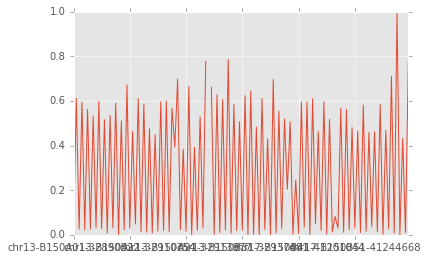

In [55]:
data_norm_by_double['008-E10_S2'].plot()